# PREDICTION WITH RANDOM FOREST REGRESSOR

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestRegressor
 

In [2]:
# read dataset may2023
df = pd.read_pickle("../../data/20230319_RTU_Dataset_PPC-Lab/combined_may2023.pkl")  

In [3]:
df

,MEM_USAGE,CPU_USAGE,PS1_V,TEMP
0,35.555417,27.343750,5.435294,28.687
1,35.555417,6.367041,5.435294,28.687
2,35.555417,7.142857,5.435294,28.687
3,35.555417,27.306273,5.435294,28.687
4,35.555417,5.639098,5.435294,28.687
...,...,...,...,...
3798,25.962425,8.396947,5.383530,29.562
3799,25.962425,6.766917,5.383530,29.562
3800,25.962425,6.000000,5.383530,29.562
3801,25.962425,8.045977,5.383530,29.562


In [96]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [97]:
training_size = int(len(df) * 0.8)

x_train = [[i] for i in df["TEMP"]][:training_size]
y_train = [i for i in df["CPU_USAGE"]][:training_size]

x_test = [[i] for i in df["TEMP"]][training_size:]
y_test = [[i] for i in df["CPU_USAGE"]][training_size:]


In [98]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = mean_absolute_percentage_error(y_test,pred) 
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 93.64849627517584
RMSE value for k=  2 is: 149.43362058789134
RMSE value for k=  3 is: 204.96481728343525
RMSE value for k=  4 is: 152.19193914865974
RMSE value for k=  5 is: 136.6376756728446
RMSE value for k=  6 is: 147.96253022570303
RMSE value for k=  7 is: 130.15746358204467
RMSE value for k=  8 is: 130.11200132785677
RMSE value for k=  9 is: 119.30047468679949
RMSE value for k=  10 is: 123.5871463001262
RMSE value for k=  11 is: 116.99588837498796
RMSE value for k=  12 is: 108.03277740077264
RMSE value for k=  13 is: 104.97305754270627
RMSE value for k=  14 is: 98.1456215685375
RMSE value for k=  15 is: 94.88139930747116
RMSE value for k=  16 is: 91.30008472407731
RMSE value for k=  17 is: 94.26809261317557
RMSE value for k=  18 is: 96.55099105720839
RMSE value for k=  19 is: 98.08388156385402
RMSE value for k=  20 is: 99.80810638944537


<Axes: >

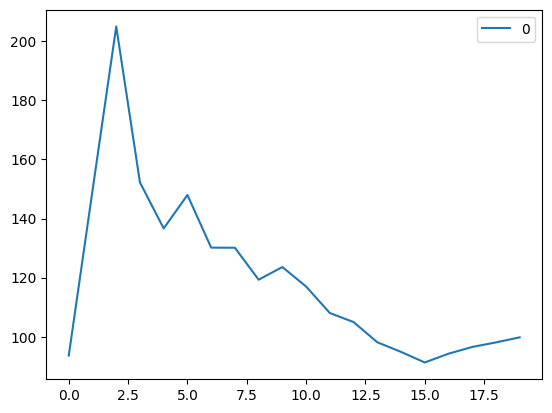

In [99]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [101]:
regressor = KNeighborsRegressor(n_neighbors=15)
regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [103]:
Y_pred = regressor.predict(x_test)

In [104]:
print(mean_absolute_percentage_error(list(Y_pred), y_test))

67.37827260056703


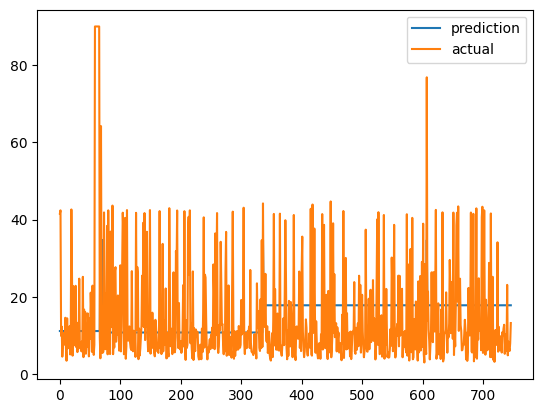

In [105]:
import matplotlib.pyplot as plt
import numpy as np

x = range(len(list(Y_pred)))
y_pred = list(Y_pred)
y_actual = y_test

plt.plot(x, y_pred, label="prediction")
plt.plot(x, y_actual, label="actual")
plt.legend()
plt.show()

In [106]:
training_size = int(len(df) * 0.8)

x_train = [[i] for i in df["CPU_USAGE"]][:training_size]
y_train = [i for i in df["TEMP"]][:training_size]

x_test = [[i] for i in df["CPU_USAGE"]][training_size:]
y_test = [[i] for i in df["TEMP"]][training_size:]


In [107]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = mean_absolute_percentage_error(y_test,pred) 
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 13.97784303023332
RMSE value for k=  2 is: 13.709050120238789
RMSE value for k=  3 is: 13.819083430856663
RMSE value for k=  4 is: 14.13652181456998
RMSE value for k=  5 is: 14.400728018739983
RMSE value for k=  6 is: 14.522052982691438
RMSE value for k=  7 is: 14.66741197381938
RMSE value for k=  8 is: 14.69189850218369
RMSE value for k=  9 is: 14.648136432594939
RMSE value for k=  10 is: 14.717941745151764
RMSE value for k=  11 is: 14.800498496915674
RMSE value for k=  12 is: 14.892717896201468
RMSE value for k=  13 is: 14.910838825781813
RMSE value for k=  14 is: 14.903825885496207
RMSE value for k=  15 is: 14.978768733036782
RMSE value for k=  16 is: 15.075606875218206
RMSE value for k=  17 is: 15.110539323992409
RMSE value for k=  18 is: 15.162825511717019
RMSE value for k=  19 is: 15.126106246208742
RMSE value for k=  20 is: 15.13997737302094


In [108]:
regressor = KNeighborsRegressor(n_neighbors=15)
regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [109]:
Y_pred = regressor.predict(x_test)

In [112]:
print(mean_absolute_percentage_error(Y_pred, y_test))

17.857738277627416


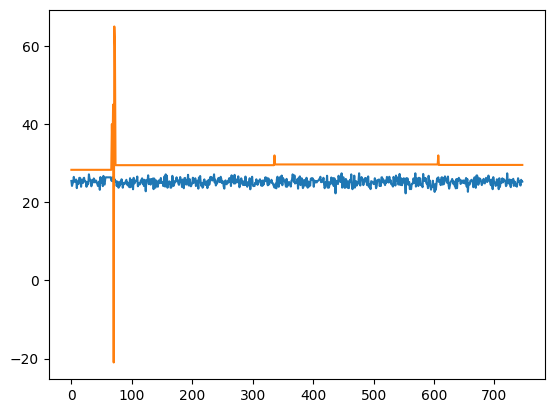

In [113]:
import matplotlib.pyplot as plt
import numpy as np

x = range(len(list(Y_pred)))
y_pred = list(Y_pred)
y_actual = y_test

plt.plot(x, y_pred)
plt.plot(x, y_actual)
plt.show()

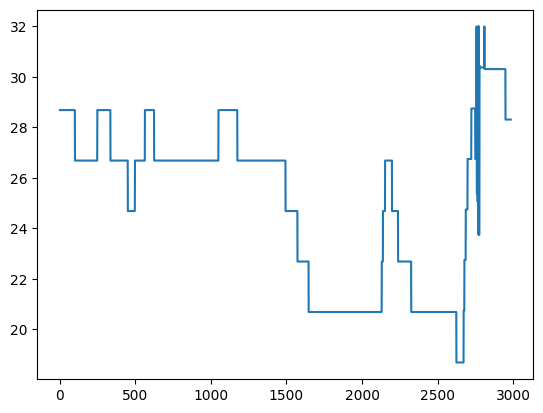

In [114]:
x = range(len(list(y_train)))
y_pred = list(y_train)

plt.plot(x, y_pred)
plt.show()